<a href="https://colab.research.google.com/github/thvarsha00/Heart-Disease-Risk-Analysis-/blob/main/Heart_Disease_Risk_Analysis_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Risk Analysis (EDA Project)**

This project explores the **UCI Heart Disease dataset** to uncover risk factors linked to heart disease.  
Using **EDA techniques** (univariate, bivariate, multivariate analysis, feature engineering, and statistical testing), we identify key predictors such as **max heart rate, ST depression, chest pain type, and exercise-induced angina**.  
The analysis confirms that **heart disease is multi-factorial** and provides a strong foundation for future **predictive modeling**.  


# **Problem Statement**

The objective of this project is to **analyze risk factors for heart disease** and explore how different patient attributes are related to disease outcomes.  
We perform a **comprehensive Exploratory Data Analysis (EDA)** on the UCI Heart Disease dataset, including:  

- **Univariate, Bivariate, and Multivariate Analysis**  
- **Feature Engineering (age groups, cholesterol levels, blood pressure categories)**  
- **Statistical Testing (Chi-Square & T-test)**  

The aim is to identify the most significant variables contributing to the likelihood of developing heart disease and provide insights that can guide predictive modeling.



# **Dataset**

- **Name:** UCI Heart Disease Dataset  
- **Source:** UCI Machine Learning Repository  
- **Description:**  
  The dataset contains patient records with both **demographic attributes** (age, sex) and **clinical attributes** (blood pressure, cholesterol, chest pain type, max heart rate, ST depression, etc.).  

- **Target variable:** target → Presence 1 or absence 0 of heart disease  



#  Import required libraries

In [30]:

import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

from scipy.stats import chi2_contingency



# Load dataset directly from UCI Repository

In [31]:
url = "https://raw.githubusercontent.com/xjcjiacheng/data-analysis/master/heart%20disease%20UCI/heart.csv"
df = pd.read_csv(url)

## **1.Initial Data Exploration (Inspection & Summary Statistics)**
# Preview dataset


In [32]:
#
print("Dataset Shape:", df.shape)



Dataset Shape: (303, 14)


# Column info (data types, non-null counts)

In [33]:


print("\nDataset Info:")
print(df.info())







Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


# Statistical summary of numerical features

In [34]:

print("\nStatistical Summary:")
print(df.describe().T)


Statistical Summary:
          count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0 

# Check for missing values

In [35]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# **2.Target Variable Analysis**

##  Step 1: Target Variable Analysis

The **target variable (`target`)** represents whether a patient has heart disease:  
- `0` → No Heart Disease  
- `1` → Heart Disease Present  

### What i did:
1. Checked the **counts** of each class.  
2. Calculated the **percentage distribution**.  
3. Visualized the results using **bar chart** and **pie chart**.  

###  Insights:
- This step helps us understand if the dataset is **balanced or imbalanced**.  
- A balanced dataset means both classes (0 & 1) have similar counts, making ML modeling easier.  
- If highly imbalanced, we would need special techniques (resampling/weights).  


# Count values of target variable

In [36]:
target_counts = df["target"].value_counts()

print("Target Value Counts:")
print(target_counts)

Target Value Counts:
target
1    165
0    138
Name: count, dtype: int64


# Percentage distribution

In [37]:
print("\nPercentage Distribution:")
print(target_counts / len(df) * 100)


Percentage Distribution:
target
1    54.455446
0    45.544554
Name: count, dtype: float64


# Plot as Bar Chart

/tmp/ipython-input-67403573.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




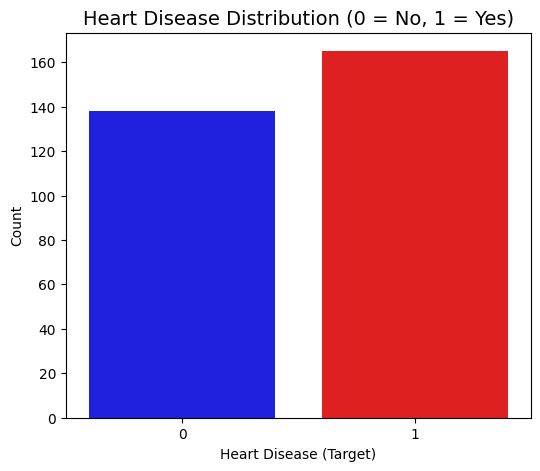

In [38]:
plt.figure(figsize=(6,5))
sns.barplot(x=target_counts.index, y=target_counts.values, palette=["blue","red"])
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)", fontsize=14)
plt.xlabel("Heart Disease (Target)")
plt.ylabel("Count")
plt.show()

# Plot as Pie Chart

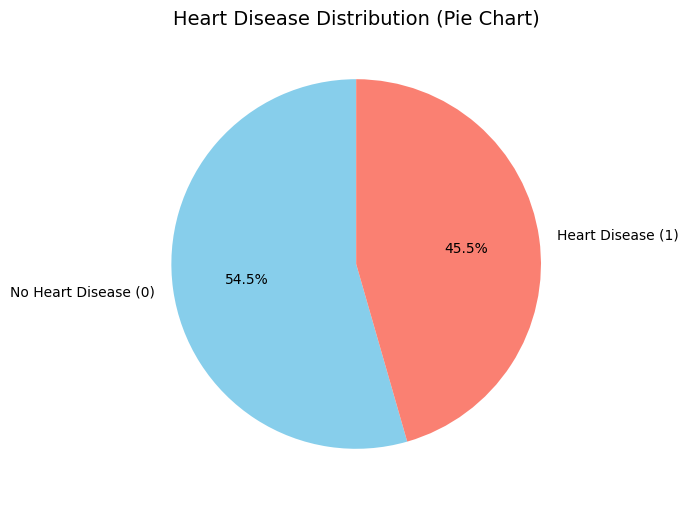

In [39]:
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=["No Heart Disease (0)", "Heart Disease (1)"],
        autopct="%1.1f%%", colors=["skyblue","salmon"], startangle=90)
plt.title("Heart Disease Distribution (Pie Chart)", fontsize=14)
plt.show()

# **3.Univariate Analysis**

# histogram for Age

In [40]:

fig = px.histogram(df, x="age", nbins=20, title="Age Distribution",
                   color_discrete_sequence=["#636EFA"])
fig.show()

#  histogram for Cholesterol

In [41]:
fig = px.histogram(df, x="chol", nbins=30, title="Cholesterol Distribution",
                   color_discrete_sequence=["#EF553B"])
fig.show()

# boxplot for Cholesterol (to detect outliers)

In [42]:
fig = px.box(df, y="chol", title="Cholesterol Outliers",
             color_discrete_sequence=["#00CC96"])
fig.show()


#  boxplot for Resting Blood Pressure

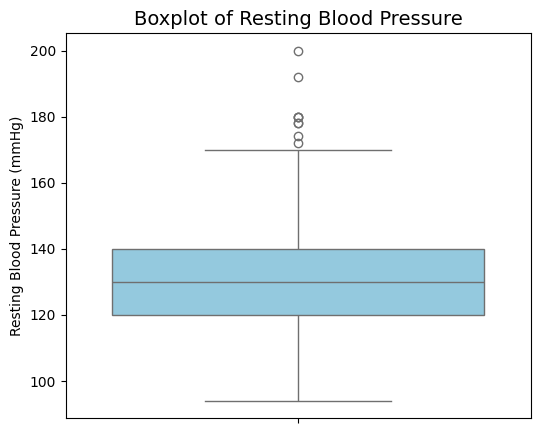

In [43]:
plt.figure(figsize=(6,5))
sns.boxplot(y=df["trestbps"], color="skyblue")
plt.title("Boxplot of Resting Blood Pressure", fontsize=14)
plt.ylabel("Resting Blood Pressure (mmHg)")
plt.show()

## **4.Bivariate Analysis (Feature vs Target)**

# Cholesterol vs Heart Disease

/tmp/ipython-input-456579521.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




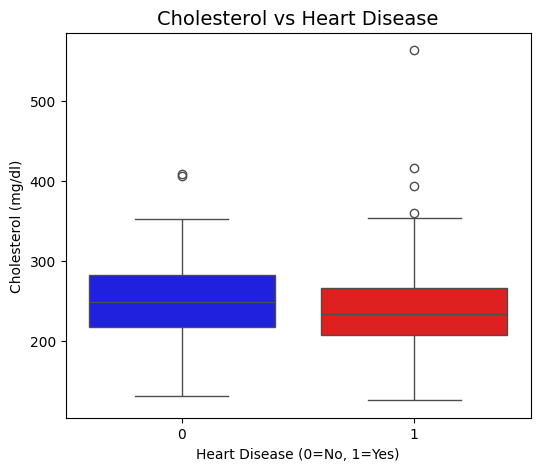

In [44]:
plt.figure(figsize=(6,5))
sns.boxplot(x="target", y="chol", data=df, palette=["blue","red"])
plt.title("Cholesterol vs Heart Disease", fontsize=14)
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Cholesterol (mg/dl)")
plt.show()


Insight: Heart disease patients often show higher cholesterol medians, though overlaps exist.

# Max Heart Rate vs Heart Disease

/tmp/ipython-input-989487057.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




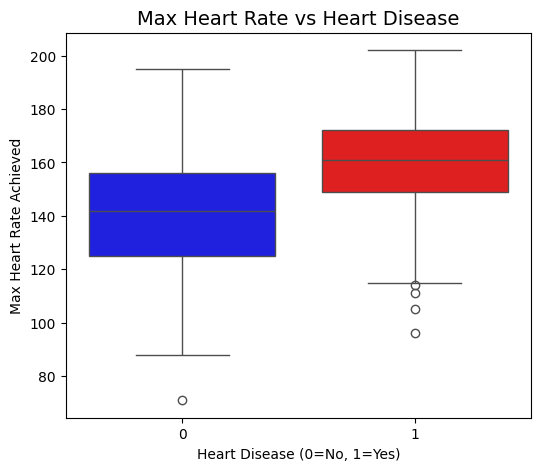

In [17]:
plt.figure(figsize=(6,5))
sns.boxplot(x="target", y="thalach", data=df, palette=["blue","red"])
plt.title("Max Heart Rate vs Heart Disease", fontsize=14)
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Max Heart Rate Achieved")
plt.show()

Insight: Patients with heart disease (target=1) tend to have lower max HR.

# Chest Pain Type vs Heart Disease (Categorical vs Target)

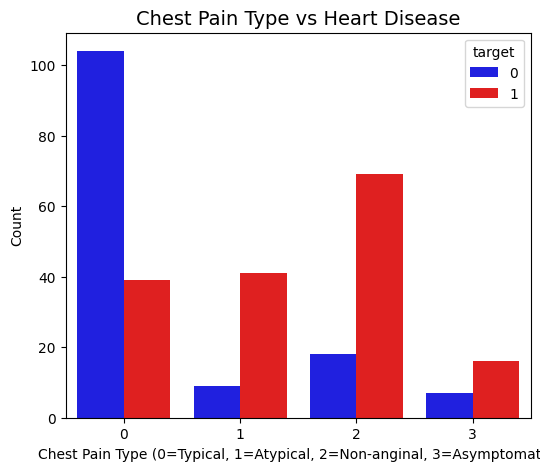

In [18]:
plt.figure(figsize=(6,5))
sns.countplot(x="cp", hue="target", data=df, palette=["blue","red"])
plt.title("Chest Pain Type vs Heart Disease", fontsize=14)
plt.xlabel("Chest Pain Type (0=Typical, 1=Atypical, 2=Non-anginal, 3=Asymptomatic)")
plt.ylabel("Count")
plt.show()


Insight: Asymptomatic chest pain (cp=3) strongly correlates with heart disease.

# violin plot

/tmp/ipython-input-652140340.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




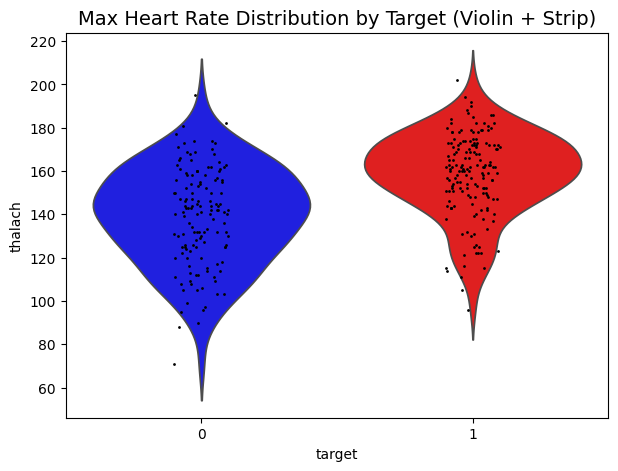

In [49]:
plt.figure(figsize=(7,5))
sns.violinplot(x="target", y="thalach", data=df, inner=None, palette=["blue","red"])
sns.stripplot(x="target", y="thalach", data=df, color="black", size=2, jitter=True)
plt.title("Max Heart Rate Distribution by Target (Violin + Strip)", fontsize=14)
plt.show()


# Swarm Plot

/tmp/ipython-input-2945817604.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




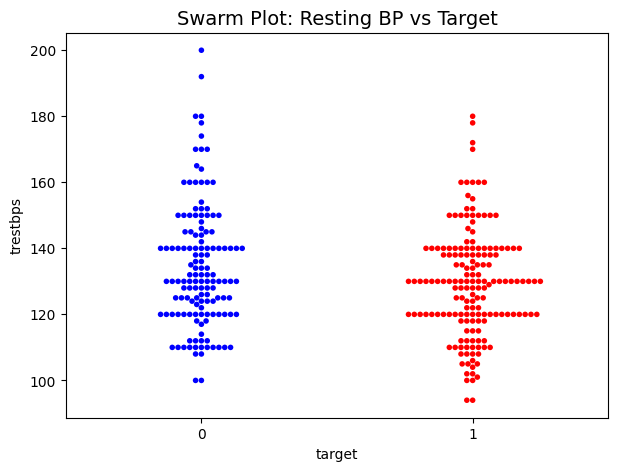

In [53]:
plt.figure(figsize=(7,5))
sns.swarmplot(x="target", y="trestbps", data=df, palette=["blue","red"], size=4)
plt.title("Swarm Plot: Resting BP vs Target", fontsize=14)
plt.show()


# **5.Multivariate Analysis (Feature vs Feature vs Target)**

# Age vs Cholesterol vs Heart Disease

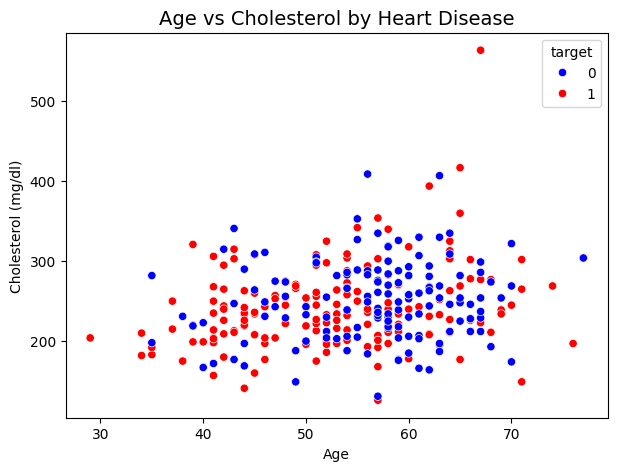

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="age", y="chol", hue="target", data=df, palette={0:"blue",1:"red"})
plt.title("Age vs Cholesterol by Heart Disease", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Cholesterol (mg/dl)")
plt.show()


Insight: Older patients with higher cholesterol cluster more in the diseased group.

# Resting BP vs Max Heart Rate vs Heart Disease

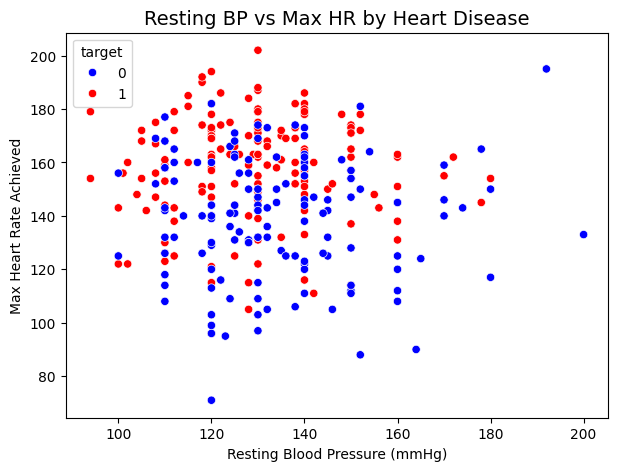

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="trestbps", y="thalach", hue="target", data=df, palette={0:"blue",1:"red"})
plt.title("Resting BP vs Max HR by Heart Disease", fontsize=14)
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.ylabel("Max Heart Rate Achieved")
plt.show()


Insight: Diseased patients often show high BP but lower max HR, forming a clear cluster.

# Age vs BP vs Cholesterol (Colored by Target)

In [21]:
fig = px.scatter_3d(df, x="age", y="trestbps", z="chol", color="target",
                    title="3D Scatter: Age vs BP vs Cholesterol (Heart Disease)",
                    color_discrete_map={0:"blue", 1:"red"},
                    hover_data=["thalach","oldpeak"])
fig.show()


Insight: Multivariate clusters form where older age + high BP + high cholesterol overlap in the heart disease group.

# Parallel Coordinates (Multi-feature comparison)

In [22]:
fig = px.parallel_coordinates(df,
                              dimensions=["age","trestbps","chol","thalach","oldpeak"],
                              color="target",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              title="Parallel Coordinates Plot of Features by Heart Disease")
fig.show()


# Pairplot (Scatter Matrix)

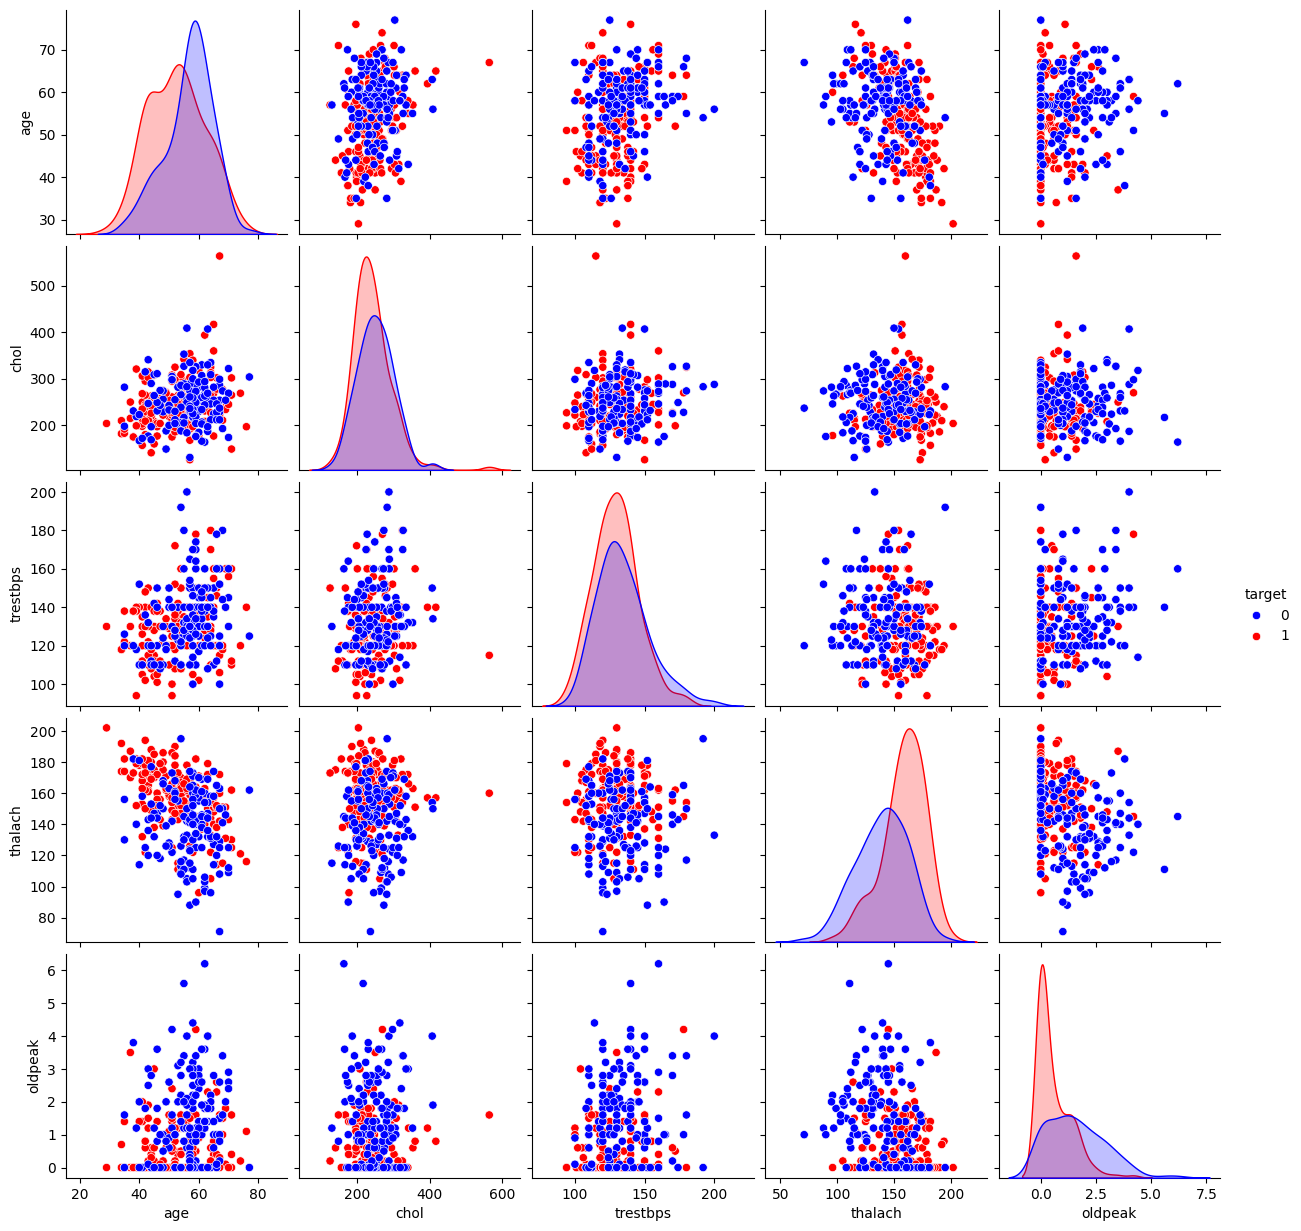

In [50]:
sns.pairplot(df[["age","chol","trestbps","thalach","oldpeak","target"]], hue="target", palette={0:"blue",1:"red"})
plt.show()


# Parallel Categories Diagram

In [51]:
fig = px.parallel_categories(df, dimensions=["sex","cp","exang","slope","target"],
                             color="target", color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()


# Bubble Plot

In [52]:
fig = px.scatter(df, x="age", y="chol", size="thalach", color="target",
                 title="Bubble Plot: Age vs Cholesterol (Bubble = Max HR)",
                 color_discrete_map={0:"blue",1:"red"})
fig.show()


# **Advanced visualization**

In [23]:
import plotly.express as px

# Define Age Groups & Cholesterol Levels first
df["age_group"] = pd.cut(df["age"], bins=[20,40,60,80], labels=["20-40","40-60","60-80"])
df["chol_level"] = pd.cut(df["chol"], bins=[0,200,240,600],
                          labels=["Normal (<200)", "Borderline (200-239)", "High (240+)"])

# Treemap
fig = px.treemap(df, path=["age_group","chol_level","target"],
                 values="chol", color="target",
                 color_continuous_scale=["blue","red"],
                 title="Treemap: Age Group → Cholesterol Level → Heart Disease")
fig.show()


/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Sunburst visualization

In [45]:

fig = px.sunburst(df, path=["sex","cp","target"],
                  values="age", color="target",
                  color_continuous_scale=["blue","red"],
                  title="Sunburst: Sex → Chest Pain Type → Heart Disease")
fig.show()


ValueError: Value of 'dimensions_0' is not the name of a column in 'data_frame'. Expected one of ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'] but received: age_group

###  6.Feature Engineering & Interactions
To make insights more interpretable, we created **new categorical features** from continuous variables:




#  Create Age Groups

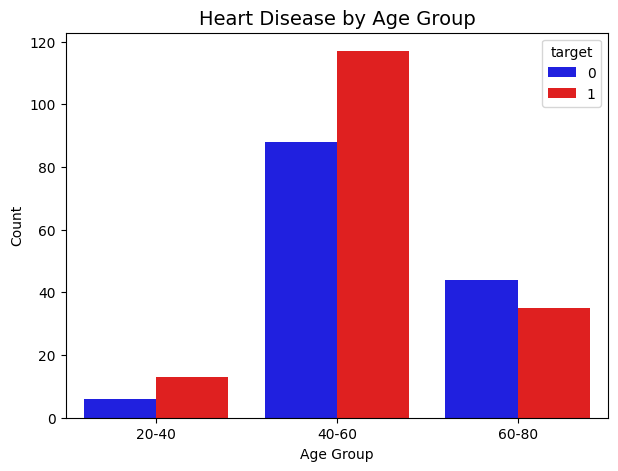

In [24]:
df["age_group"] = pd.cut(df["age"], bins=[20, 40, 60, 80], labels=["20-40", "40-60", "60-80"])

plt.figure(figsize=(7,5))
sns.countplot(data=df, x="age_group", hue="target", palette=["blue","red"])
plt.title("Heart Disease by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

#  Create Cholesterol Categories

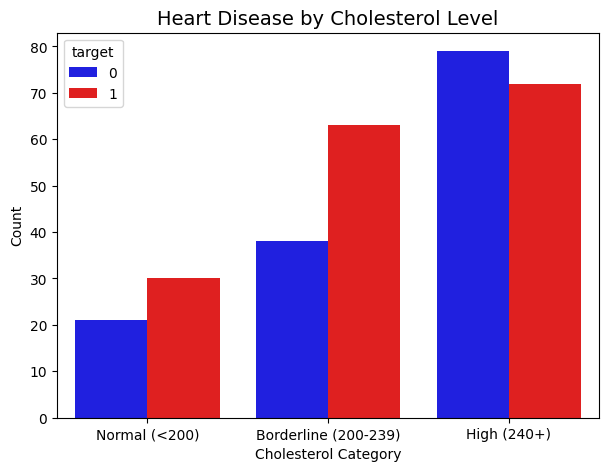

In [25]:
df["chol_level"] = pd.cut(df["chol"], bins=[0, 200, 240, 600], labels=["Normal (<200)", "Borderline (200-239)", "High (240+)"])

plt.figure(figsize=(7,5))
sns.countplot(data=df, x="chol_level", hue="target", palette=["blue","red"])
plt.title("Heart Disease by Cholesterol Level", fontsize=14)
plt.xlabel("Cholesterol Category")
plt.ylabel("Count")
plt.show()


#  Create Blood Pressure Categories (based on medical standards)

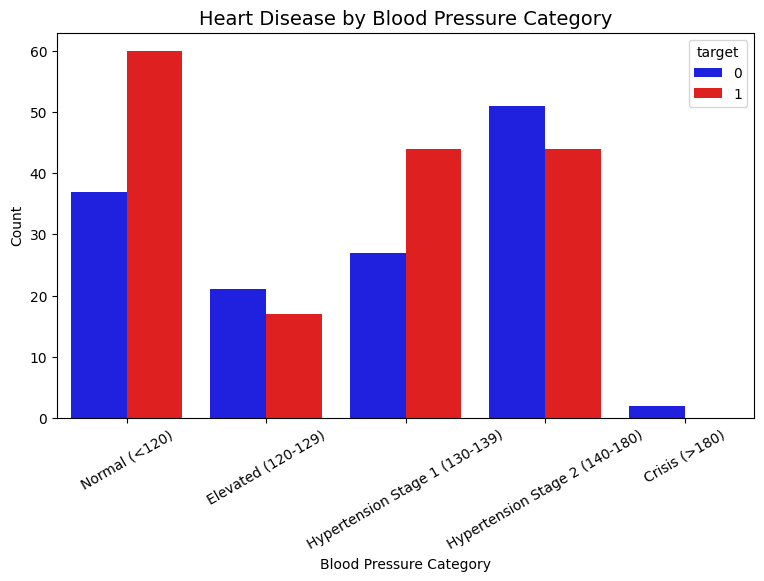

In [26]:
df["bp_category"] = pd.cut(df["trestbps"], bins=[0, 120, 129, 139, 180, 300],
                           labels=["Normal (<120)", "Elevated (120-129)", "Hypertension Stage 1 (130-139)", "Hypertension Stage 2 (140-180)", "Crisis (>180)"])

plt.figure(figsize=(9,5))
sns.countplot(data=df, x="bp_category", hue="target", palette=["blue","red"])
plt.title("Heart Disease by Blood Pressure Category", fontsize=14)
plt.xlabel("Blood Pressure Category")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

#  Age Group + Cholesterol Level Interaction (Heatmap)

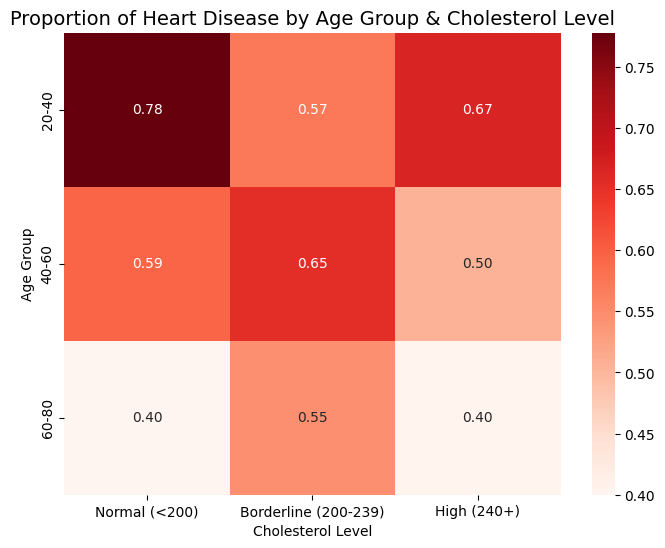

In [27]:
pivot_table = pd.crosstab(df["age_group"], df["chol_level"], values=df["target"], aggfunc="mean")

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap="Reds", fmt=".2f")
plt.title("Proportion of Heart Disease by Age Group & Cholesterol Level", fontsize=14)
plt.xlabel("Cholesterol Level")
plt.ylabel("Age Group")
plt.show()

# **7. Statistical Testing**

# Chi-Square Test (Categorical vs Target)

In [28]:


# Function for chi-square test
def chi_square_test(feature):
    table = pd.crosstab(df[feature], df["target"])
    chi2, p, dof, ex = chi2_contingency(table)
    return chi2, p

# Run chi-square tests for categorical features
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

for feature in categorical_features:
    chi2, p = chi_square_test(feature)
    print(f"Feature: {feature} --> Chi2 = {chi2:.2f}, p-value = {p:.4f}")



Feature: sex --> Chi2 = 22.72, p-value = 0.0000
Feature: cp --> Chi2 = 81.69, p-value = 0.0000
Feature: fbs --> Chi2 = 0.11, p-value = 0.7444
Feature: restecg --> Chi2 = 10.02, p-value = 0.0067
Feature: exang --> Chi2 = 55.94, p-value = 0.0000
Feature: slope --> Chi2 = 47.51, p-value = 0.0000
Feature: ca --> Chi2 = 74.37, p-value = 0.0000
Feature: thal --> Chi2 = 85.30, p-value = 0.0000


# **T-Test**

In [29]:
from scipy.stats import ttest_ind

# Split dataset into two groups
group0 = df[df["target"] == 0]   # No heart disease
group1 = df[df["target"] == 1]   # Heart disease

# Numerical features to test
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

results = []

for feature in numeric_features:
    stat, p = ttest_ind(group0[feature], group1[feature], nan_policy="omit")
    results.append([feature, stat, p])

# Convert results into a DataFrame for better readability
ttest_results = pd.DataFrame(results, columns=["Feature", "T-statistic", "P-value"])
ttest_results["Significant (p<0.05)"] = ttest_results["P-value"] < 0.05

ttest_results


,Feature,T-statistic,P-value,Significant (p<0.05)
0,age,4.014561,7.524801e-05,True
1,trestbps,2.541293,1.154606e-02,True
2,chol,1.484245,1.387903e-01,False
3,thalach,-8.069703,1.697338e-14,True
4,oldpeak,8.279580,4.085346e-15,True




###  Conclusion:
Heart disease risk increases notably with **age, abnormal chest pain patterns, high BP, high cholesterol, reduced heart rate capacity, and exercise-induced angina**.  
The analysis confirms that **heart disease is multi-factorial**, and these findings provide a strong foundation for building predictive machine learning models (e.g., Logistic Regression, Random Forest) to assess patient risk more accurately.  
  
